<a href="https://colab.research.google.com/github/a-ma-n/Codechef/blob/main/titanicCodechef_task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predictions

### Data Analysis

In [73]:
import seaborn as sns
import numpy as np
import pandas as pd
import pickle

titanic=pd.read_csv('titanic.csv')


In [74]:
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
titanic.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [76]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [77]:
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


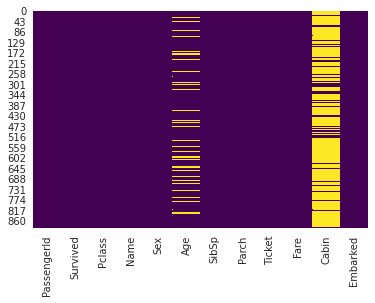

In [78]:
sns.heatmap(titanic.isnull(),cbar=False,cmap='viridis')
#This indicates that if cabin values are absent in the dataset we should remove 
#them and we see in age column there are
# moderate missing values so  we will try to replace them with appropriate values 

In [79]:
titanic.drop(columns='Cabin',inplace=True)

In [80]:
sns.set_style('whitegrid')

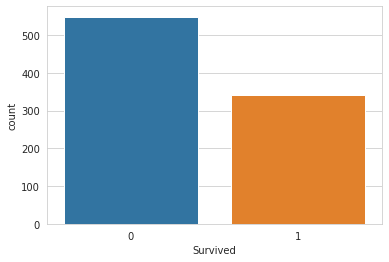

In [81]:
sns.countplot(x='Survived',data=titanic)#We see the number of people who surived vs who didnt

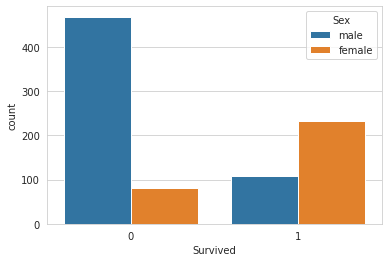

In [82]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=titanic)
#more female survivedand more male died

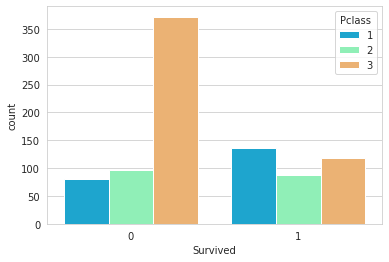

In [83]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=titanic,palette='rainbow')
# We see that the the better the class(lesser number) the more the chance of survival comparitively

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


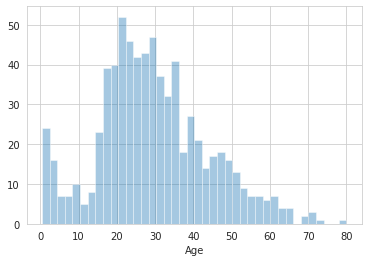

In [84]:
sns.distplot(titanic['Age'].dropna(),kde=False,bins=40)
# we infer the age of people were in the range 20-30 and infants and 
#kids were more in on the ship

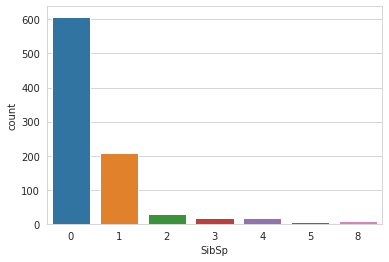

In [85]:
sns.countplot(x='SibSp',data=titanic)#people with  siblings and spouse

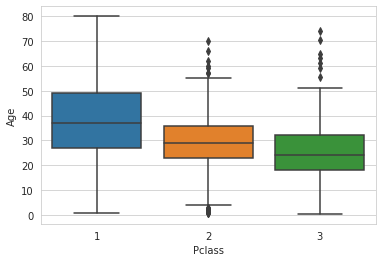

In [86]:
sns.boxplot(x='Pclass',y='Age',data=titanic)
# here we infer that people in class1 are more older as they would be more wealthy

In [87]:
def impute_age(cols):# we assume that the better class the mean from 
#boxplot will give the predicted age like better class(lower number)
#so better class corresponds to higher age we substitute theses valuesin our datset
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 36

        elif Pclass == 2:
            return 28

        else:
            return 23

    else:
        return Age

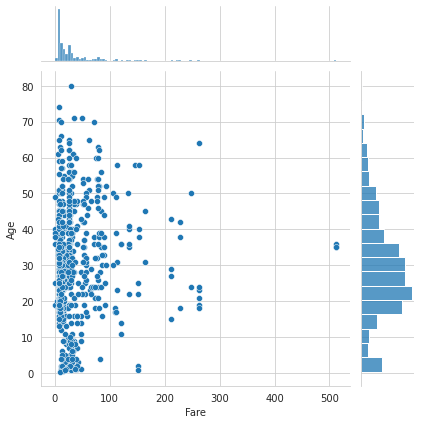

In [88]:
sns.jointplot(x='Fare',y='Age',data=titanic,kind='scatter')
# here we see more peole go for a cheaper fare and 
#more passengers have ages near 20-30 as found earlier 

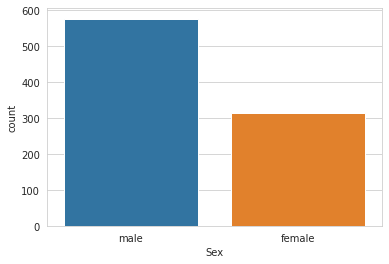

In [89]:
sns.countplot(x='Sex',data=titanic)
# we have more males on the ship but we see ore female survived

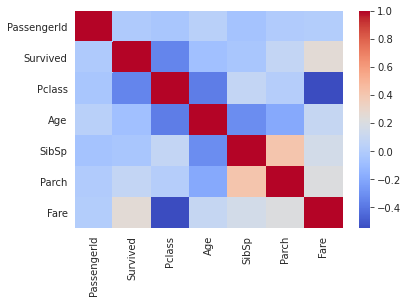

In [90]:
sns.heatmap(titanic.corr(),cmap='coolwarm')
#p class is oppositley related to fare as awe see more the fare less the class number and also better calss means better chance of survival
#here diagonal is 1 as diagonal has same values  and Sibsp and Parch are closely related
#Parch - Number of Parents/Children Aboard
#Sibsp - Number of Siblings/Spouses Aboard
#pclass is related to age thats older age corresponds to  lower class
#similarly 
#and this makes sense as they will have a family so they are closely related
#also we see the fare increases so the chance of survival 

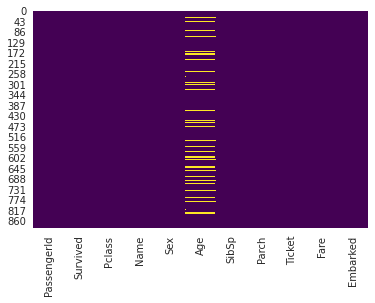

In [91]:
sns.heatmap(titanic.isnull(),cbar=False,cmap='viridis')#check the missing values in age

In [92]:
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age,axis=1)#called our custom fn for putting mssing values

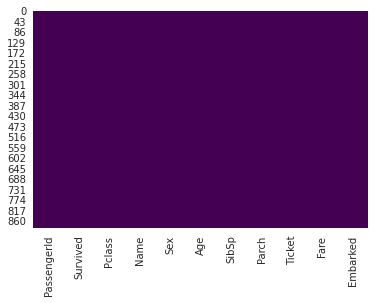

In [93]:
sns.heatmap(titanic.isnull(),cbar=False,cmap='viridis')

In [94]:
titanic.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [95]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [96]:
titanic.dropna(inplace=True)

## Conversion to categorical variables

In [97]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [98]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [99]:
pd.get_dummies(titanic['Embarked'],drop_first=True).head()#get dummies to conver the 3 categories of Embarked now we drop th first coz if the 2 are false then it automatically means that 3rd is true

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [100]:
sex=pd.get_dummies(titanic['Sex'],drop_first=True)
embarked=pd.get_dummies(titanic['Embarked'],drop_first=True)

In [101]:
titanic.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [102]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [103]:
titanic=pd.concat([titanic,sex,embarked],axis=1)

In [104]:
titanic

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,23.0,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


# Training

### Fitting

In [109]:
from sklearn.model_selection import train_test_split
#titanic.drop(labels=['Date','Location','WindDir9am','WindGustDir','WindDir3pm'],axis=1,inplace=True)
# #weather.drop(labels=['WindDir3pm'],axis=1,inplace=True)
# titanic.RainTomorrow.replace(to_replace=['No', 'Yes'], value=[0, 1],inplace=True)
# titanic.RainToday.replace(to_replace=['No', 'Yes'], value=[0, 1],inplace=True)

#weather=weather.fillna(0)

X=titanic.drop('Survived',axis=1)
y=titanic['Survived']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=20)


## **Logistic regression**

In [111]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,predictions))

[[146  20]
 [ 30  71]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [112]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       166
           1       0.78      0.70      0.74       101

    accuracy                           0.81       267
   macro avg       0.80      0.79      0.80       267
weighted avg       0.81      0.81      0.81       267



## **K-nearest Neighbours**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


*choosing k value*

In [ ]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    


In [ ]:
error_rate

[0.4205607476635514,
 0.38317757009345793,
 0.38317757009345793,
 0.3691588785046729,
 0.37850467289719625,
 0.3691588785046729,
 0.3878504672897196,
 0.35514018691588783,
 0.38317757009345793,
 0.35514018691588783,
 0.3925233644859813,
 0.3598130841121495,
 0.3691588785046729,
 0.32242990654205606,
 0.32710280373831774,
 0.32710280373831774,
 0.32710280373831774,
 0.3411214953271028,
 0.3317757009345794,
 0.3317757009345794,
 0.3411214953271028,
 0.32242990654205606,
 0.3411214953271028,
 0.32710280373831774,
 0.34579439252336447,
 0.32710280373831774,
 0.3317757009345794,
 0.32710280373831774,
 0.3317757009345794,
 0.32242990654205606,
 0.32242990654205606,
 0.32242990654205606,
 0.32242990654205606,
 0.308411214953271,
 0.32242990654205606,
 0.3037383177570093,
 0.3130841121495327,
 0.308411214953271,
 0.3037383177570093]

In [ ]:
error_rate.index(min(error_rate))

35

In [ ]:
knn = KNeighborsClassifier(n_neighbors=34)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=34')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=34


[[125   4]
 [ 62  23]]


              precision    recall  f1-score   support

           0       0.67      0.97      0.79       129
           1       0.85      0.27      0.41        85

    accuracy                           0.69       214
   macro avg       0.76      0.62      0.60       214
weighted avg       0.74      0.69      0.64       214



## **Descision Trees**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[90 39]
 [28 57]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       129
           1       0.59      0.67      0.63        85

    accuracy                           0.69       214
   macro avg       0.68      0.68      0.68       214
weighted avg       0.70      0.69      0.69       214



## **Random Forests**

In [113]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [114]:
rfc_pred = rfc.predict(X_test)

print(confusion_matrix(y_test,rfc_pred))


[[144  22]
 [ 31  70]]


In [117]:
print(classification_report(y_test,rfc_pred))
model=rfc

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       166
           1       0.76      0.69      0.73       101

    accuracy                           0.80       267
   macro avg       0.79      0.78      0.78       267
weighted avg       0.80      0.80      0.80       267



## **SVM**


In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_model=SVC()
svc_model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C': [1, 10], 'gamma': [10,1,0.1,0.01]} 

In [ ]:
grid=GridSearchCV(SVC(),param_grid,verbose=2,refit=2)

In [ ]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] C=1, gamma=10 ...................................................
[CV] .................................... C=1, gamma=10, total=   0.0s
[CV] C=1, gamma=10 ...................................................
[CV] .................................... C=1, gamma=10, total=   0.0s
[CV] C=1, gamma=10 ...................................................
[CV] .................................... C=1, gamma=10, total=   0.0s
[CV] C=1, gamma=10 ...................................................
[CV] .................................... C=1, gamma=10, total=   0.0s
[CV] C=1, gamma=10 ...................................................
[CV] .................................... C=1, gamma=10, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................... C=1, gamma=0.1, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .................................. C=1, gamma=0.01, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .................................. C=1, gamma=0.01, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .................................. C=1, gamma=0.01, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .................................. C=1, gamma=0.01, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .................................. C=1, gamma=0.01, total=   0.0s
[CV] C=10, gamma=10 ..................................................
[CV] ................................... C=10, gamma=10, total=   0.0s
[CV] C=10, gamma=10 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.6s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10], 'gamma': [10, 1, 0.1, 0.01]},
             pre_dispatch='2*n_jobs', refit=2, return_train_score=False,
             scoring=None, verbose=2)

In [ ]:
grid_predictions=grid.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,grid_predictions))

[[129   0]
 [ 85   0]]


In [ ]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       129
           1       0.00      0.00      0.00        85

    accuracy                           0.60       214
   macro avg       0.30      0.50      0.38       214
weighted avg       0.36      0.60      0.45       214



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Saving the model

In [120]:
filename = 'finalized_model.sav'

pickle.dump(model, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8014981273408239


# Results:

## **Logistic Regression**
[[109  20]
 [ 28  57]]
 precision    recall  f1-score   support

           0       0.80      0.84      0.82       129
           1       0.74      0.67      0.70        85

    accuracy                           0.78       214
   macro avg       0.77      0.76      0.76       214
weighted avg       0.77      0.78      0.77       214

## **KNN:**
[[125   4]
 [ 62  23]]


              precision    recall  f1-score   support

           0       0.67      0.97      0.79       129
           1       0.85      0.27      0.41        85

    accuracy                           0.69       214
   macro avg       0.76      0.62      0.60       214
weighted avg       0.74      0.69      0.64       214
## **Descision Tree**
[[90 39]
 [28 57]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       129
           1       0.59      0.67      0.63        85

    accuracy                           0.69       214
   macro avg       0.68      0.68      0.68       214
weighted avg       0.70      0.69      0.69       214

## **Random Forests:**
trees=100

[[114  15]
 [ 27  58]]

 precision    recall  f1-score   support

           0       0.81      0.88      0.84       129
           1       0.79      0.68      0.73        85

    accuracy                           0.80       214
   macro avg       0.80      0.78      0.79       214
weighted avg       0.80      0.80      0.80       214

## **SVM:**

[[129   0]
 [ 85   0]]

precision    recall  f1-score   support

           0       0.60      1.00      0.75       129
           1       0.00      0.00      0.00        85

    accuracy                           0.60       214
   macro avg       0.30      0.50      0.38       214
weighted avg       0.36      0.60      0.45       214


# We conclude that the random forest classifier is the best model with a accuracy of 80%